# Построить топ фильмов в категориях Action и Comedy

In [1]:
import pandas as pd

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [141]:
# Объединим данные
df=pd.merge(movies,ratings, how='outer', on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [142]:
# Поставим фильтры на жанр фильмов
comedy=df[df.genres.str.lower().str.contains('comedy')]
action=df[df.genres.str.lower().str.contains('action')]

In [49]:
# Расчитаем кол-во голосов и средний рейтинг каждого фильма
df1=df.groupby('title').agg({'title':['count'], 'rating':['mean']})
df1.head()

,title,rating
,count,mean
title,,
'71 (2014),1,4.0
'Hellboy': The Seeds of Creation (2004),1,4.0
'Round Midnight (1986),2,3.5
'Salem's Lot (2004),1,5.0
'Til There Was You (1997),2,4.0


In [106]:
# M – порог голосов, необходимый для участия в рейтинге, возьмем М=10
df1['title'].mean()
M=10

In [48]:
# среднее значение рейтинга всех фильмов
С=df.rating.mean()
С

3.501556983616962

In [121]:
# Кол-во голосов и средний рейтинг каждого фильма при более 10 голосах
df4=pd.DataFrame(df1['title']['count'].reset_index())
df5=pd.DataFrame(df1['rating']['mean'].reset_index())
df6=pd.merge(df4,df5, how='outer', on='title')
df7=df6.query('count>9') # берем фильмы, на котором более 10 голосов
df7.head()

,title,count,mean
6,"'burbs, The (1989)",17,3.176471
8,(500) Days of Summer (2009),42,3.666667
16,10 Cloverfield Lane (2016),14,3.678571
18,10 Things I Hate About You (1999),54,3.527778
20,"10,000 BC (2008)",17,2.705882


### Воспользуемся следующей формулой для расчета рейтинга

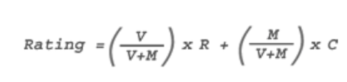

V –  количество голосов за фильм
M –  порог голосов, необходимый для участия в рейтинге 
R –  среднее арифметическое всех голосов за фильм
С –  среднее значение рейтинга всех фильмов 

In [156]:
def solve_rating(data):
    """
    функция для расчета рейтинга по формуле, которая представлена выше
    """
    V=data['count'] 
    M=10
    R=data['mean']
    C=df.rating.mean()
    
    for i in data:
        return (V/(V+M))*R+(M/(V+M))*C
    

## Расчет рейтинга для жанра экшн

In [153]:
# Объединяем данные интересующего жанра со статистикой пунктом выше и удаляем дубликаты с отсуствующими данными 
df8=pd.merge(action,df7, how='outer', on='title') 
action_rating=df8.drop_duplicates(subset='title').dropna()
action_rating.head()

,movieId,title,genres,userId,rating,timestamp,count,mean
0,6.0,Heat (1995),Action|Crime|Thriller,1.0,4.0,9.649822e+08,102.0,3.946078
102,9.0,Sudden Death (1995),Action,151.0,4.0,8.559474e+08,16.0,3.125000
118,10.0,GoldenEye (1995),Action|Adventure|Thriller,6.0,3.0,8.455533e+08,132.0,3.496212
250,15.0,Cutthroat Island (1995),Action|Adventure|Romance,6.0,4.0,8.455545e+08,13.0,3.000000
263,20.0,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,78.0,3.0,1.252573e+09,15.0,2.500000


In [150]:
# Применяем функцию расчета рейтинга к фильмам жанра action и сортируем для получения топ 10
action_rating['rating']=action_rating.apply(solve_rating,axis=1)
action_rating.sort_values(by='rating',ascending=False).head(10)

,movieId,title,genres,userId,rating,timestamp,count,mean
14652,2959.0,Fight Club (1999),Action|Crime|Drama|Thriller,1.0,4.239103,9.649833e+08,218.0,4.272936
1901,260.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1.0,4.203125,9.649817e+08,251.0,4.231076
25066,58559.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2.0,4.191922,1.445715e+09,149.0,4.238255
6875,1197.0,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,1.0,4.184313,9.649819e+08,142.0,4.232394
6664,1196.0,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,1.0,4.183328,9.649818e+08,211.0,4.215640
7017,1198.0,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,1.0,4.173884,9.649818e+08,200.0,4.207500
12929,2571.0,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1.0,4.168457,9.649819e+08,278.0,4.192446
7415,1208.0,Apocalypse Now (1979),Action|Drama|War,1.0,4.158253,9.649832e+08,107.0,4.219626
11358,2028.0,Saving Private Ryan (1998),Action|Drama|War,1.0,4.113715,9.649819e+08,188.0,4.146277
7540,1210.0,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,1.0,4.106872,9.649805e+08,196.0,4.137755


## Расчет рейтинга для комедий

In [151]:
df9=pd.merge(comedy,df7, how='outer', on='title')
comedy_rating=df9.drop_duplicates(subset='title').dropna()
comedy_rating.head()

,movieId,title,genres,userId,rating,timestamp,count,mean
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,215.0,3.920930
215,3.0,Grumpier Old Men (1995),Comedy|Romance,1.0,4.0,964981247.0,52.0,3.259615
274,5.0,Father of the Bride Part II (1995),Comedy,6.0,5.0,845553938.0,49.0,3.071429
323,7.0,Sabrina (1995),Comedy|Romance,6.0,4.0,845554264.0,54.0,3.185185
377,11.0,"American President, The (1995)",Comedy|Drama|Romance,6.0,4.0,845553489.0,70.0,3.671429


In [152]:
comedy_rating['rating']=comedy_rating.apply(solve_rating,axis=1)
comedy_rating.sort_values(by='rating',ascending=False).head(10)

,movieId,title,genres,userId,rating,timestamp,count,mean
7142,750.0,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,7.0,4.196407,1.106637e+09,97.0,4.268041
9311,1197.0,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,1.0,4.184313,9.649819e+08,142.0,4.232394
2580,296.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1.0,4.175128,9.649830e+08,307.0,4.197068
3551,356.0,Forrest Gump (1994),Comedy|Drama|Romance|War,1.0,4.144589,9.649810e+08,329.0,4.164134
25871,4973.0,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,16.0,4.130889,1.377477e+09,120.0,4.183333
9024,1136.0,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,1.0,4.116545,9.649813e+08,136.0,4.161765
7845,898.0,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,4.0,4.102963,9.646233e+08,29.0,4.310345
23327,4011.0,Snatch (2000),Comedy|Crime|Thriller,13.0,4.092384,9.878957e+08,93.0,4.155914
6524,608.0,Fargo (1996),Comedy|Crime|Drama|Thriller,1.0,4.083851,9.649829e+08,181.0,4.116022
15811,2324.0,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,4.0,4.081792,9.646226e+08,88.0,4.147727
